Chris Panican <br/>
Project <br/>
Machine Learning <br/>

insert number and figure out where

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('rent_balance.csv')
df.head()
# 0: Bronx
# 1: Brooklyn
# 2: Manhattan
# 3: Queens
# 4: Staten Island

,bath,bed,price,size,street,where,boro
0,1.0,1.0,1000,800.0,151 Trenton Ct #2,Princes Bay,4
1,4.0,4.0,14950,2700.0,275 Central Park West #5C,Upper West Side,2
2,1.0,1.0,1275,1100.0,1404 Noble Avenue #4D,Soundview,0
3,2.5,3.0,2400,1900.0,318 Willcox Street,Mariners Harbor,4
4,1.0,1.0,3800,700.0,340 East 23rd Street #11C,Gramercy Park,2


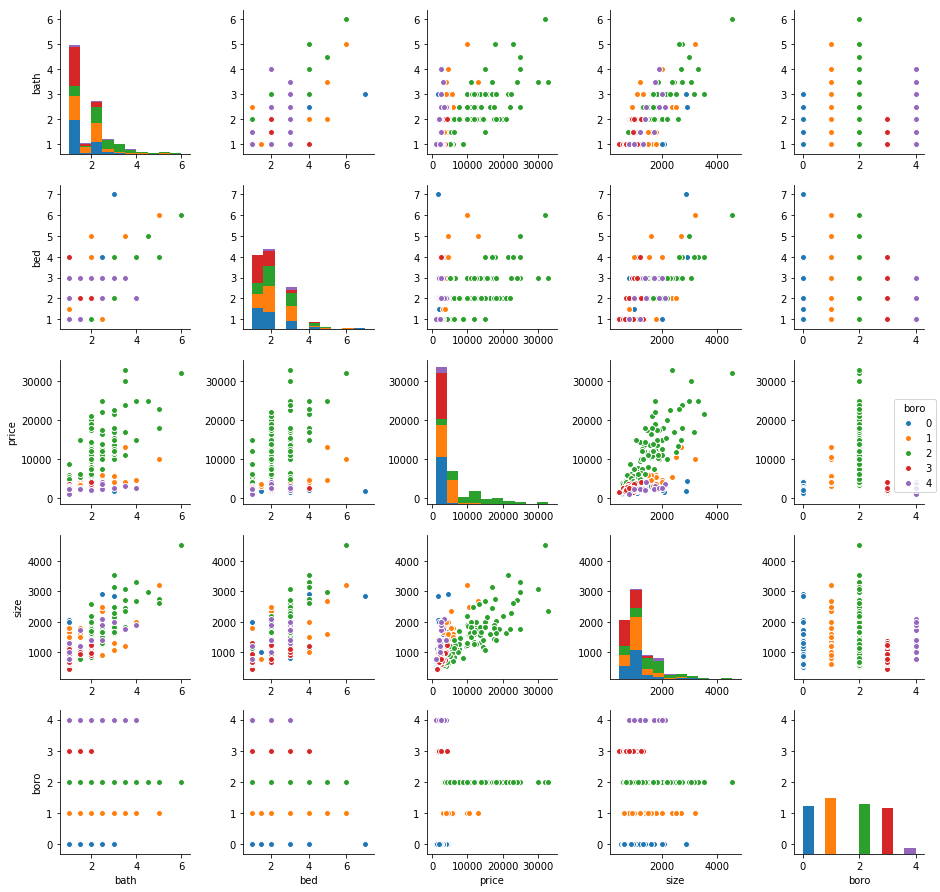

In [3]:
cols = ["bath", "bed", "price", "size", "where", "boro"]
sns.pairplot(df[cols], hue='boro', size=2.5)
plt.tight_layout()
plt.show()

In [4]:
# Remove Staten Island. Not Enough Data
df = df[df.boro != 4]

### Constants

In [5]:
X = df.loc[:, :'size']
y = df.loc[:, 'boro':'boro']

# Linear Regression

In [6]:
# Helper function that prints training data, validation data and test data
def print_validation_test_data(regressors, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    # Train the regressors
    method = regressors
    method.fit(X_train, y_train.values.ravel())
    y_train_pred = method.predict(X_train)
    y_test_pred = method.predict(X_test)
    
    # Train_score and test_score
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    validation_score = method.score(X_val, y_val)
    
    # Print
    reg_name = str(regressors).split('(', 1)[0]
    print("{}\nTraining: {}\nValidation: {}\nTest: {}\n".format(reg_name, train_score, validation_score, test_score))

In [7]:
regressors = [LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0), ElasticNet(alpha=1.0), SVR(C=1.0)]
for i in regressors:
    print_validation_test_data(i, test_size=0.3, random_state=1)

LinearRegression
Training: 0.08855822640551614
Validation: 0.10816870124618005
Test: 0.06706471079878018

Ridge
Training: 0.08855765080627265
Validation: 0.1081792513752633
Test: 0.06707659746688455

Lasso
Training: 0.08010957643203964
Validation: 0.10481157566706345
Test: 0.05403580666717067

ElasticNet
Training: 0.08011532409682187
Validation: 0.10484619075175394
Test: 0.053750195058641204

SVR
Training: 0.898802256520111
Validation: 0.8837770229644153
Test: 0.22751688581419816



# Logistic Regression

In [8]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_train_combined=np.concatenate([y_train.values.ravel(), y_test.values.ravel()],axis=0)
y_combined = np.hstack((y_train_combined))

lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_std, np.ravel(y_train,order='C'))
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

Accuracy: 0.71


# SVM 

In [9]:
from sklearn.svm import SVC

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
clf = SVC(kernel='rbf', gamma=0.000001, C=1)
clf.fit(X_train, y_train.values.ravel())

# Bath, bed, price, sqft
print(clf.predict([[1.0, 1.0, 2300, 1000]]))  # Expected 3: Queens
print(clf.score(X_test, y_test))

[3]
0.790476190476


In [11]:
print(clf.predict([[1.0, 1.0, 1000, 1000]]))  # Expected 0: Bronx

[0]


In [12]:
print(clf.predict([[1.0, 1.0, 8000, 1000]]))  # Expected 2: Manhattan

[2]


In [13]:
print(clf.predict([[1.0, 1.0, 3000, 1000]]))  # Expected 1: Brooklyn

[1]


# Decision Tree w/ AdaBoost

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [16]:
tree = DecisionTreeClassifier(random_state=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.01, random_state=1)

In [17]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree\nTrain Accuracy: %.3f\nTest Accuracy: %.3f' % (tree_train, tree_test))

Decision tree
Train Accuracy: 1.000
Test Accuracy: 0.733


In [18]:
ada = ada.fit(X_train, y_train.values.ravel())
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost\nTrain Accuracy: %.3f\nTest Accuracy: %.3f' % (ada_train, ada_test))

AdaBoost
Train Accuracy: 1.000
Test Accuracy: 0.743


In [19]:

# Fit for various depth trees
MaxDepth = 15
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train.values.ravel())

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.5 0.5
2 0.22380952381 0.271428571429
3 0.190476190476 0.252380952381
4 0.142857142857 0.242857142857
5 0.0952380952381 0.266666666667
6 0.0619047619048 0.252380952381
7 0.0285714285714 0.233333333333
8 0.0190476190476 0.252380952381
9 0.0047619047619 0.257142857143
10 0.0 0.257142857143
11 0.0 0.257142857143
12 0.0 0.257142857143
13 0.0 0.257142857143
14 0.0 0.257142857143
15 0.0 0.257142857143


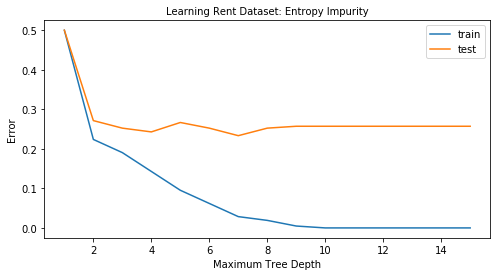

In [20]:
from matplotlib.ticker import MaxNLocator 
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Rent Dataset: Entropy Impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

1 0.452380952381 0.47619047619
2 0.442857142857 0.509523809524
3 0.0952380952381 0.290476190476
4 0.0 0.261904761905
5 0.0 0.247619047619
6 0.0 0.204761904762
7 0.0 0.252380952381
8 0.0 0.238095238095
9 0.0 0.252380952381
10 0.0 0.257142857143
11 0.0 0.257142857143
12 0.0 0.257142857143
13 0.0 0.257142857143
14 0.0 0.257142857143
15 0.0 0.257142857143


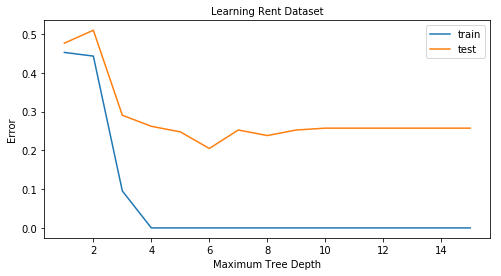

In [21]:
MaxDepth = 15
Errors = np.zeros((MaxDepth,2))

for i in range(0,MaxDepth):
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i+1), learning_rate=0.1, random_state=1)
    ada.fit(X_train, y_train.values.ravel())
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))


    Errors[i,0] = 1 - ada.score(X_train,y_train)
    Errors[i,1] = 1 - ada.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Rent Dataset', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

In [23]:
rf = RandomForestClassifier(max_depth=1000, random_state=0)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1000, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
predictions = rf.predict(X_test)
errors = abs(predictions - y_test.values.ravel())
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.52


In [25]:
# Training score
rf.score(X_train, y_train)

0.98571428571428577

In [26]:
# Test score
rf.score(X_test, y_test)

0.74761904761904763

In [27]:
print(rf.predict([[1.0, 1.0, 13000, 100]]))  # Expected 2: Manhattan

[1]


In [28]:
print(rf.predict([[1.0, 1.0, 1000, 1000]]))  # Expected 0: Bronx

[0]


In [29]:
print(rf.predict([[1.0, 1.0, 7000, 1000]]))  # Expected 2: Manhattan

[2]


In [30]:
print(rf.predict([[1.0, 1.0, 3000, 1000]]))  # Expected 1: Brooklyn

[1]


In [31]:
print(rf.predict([[1.0, 1.0, 2500, 1000]]))

[3]
